# COVID-19 timeseries closer look

In this section, we will closely examine the number of COVID-19-related articles and compare them to the new COVID-19 cases worldwide.

## 1. Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 2. Reading data

In [2]:
df = pd.read_parquet("data/cleaned_parquet/final/P5_final_new.parquet")
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,...,cleaned_title_tokens_hf,cleaned_abstract_tokens_simple,cleaned_abstract_tokens_hf,disease_title_tokens_simple,disease_title_tokens_hf,disease_abstract_tokens_simple,disease_abstract_tokens_hf,disease_abstract_spacy,disease_title_spacy,disease_mesh_terms_spacy
0,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01,...,"[[CLS], potential, impact, health, care, refor...","[general, article, observes, despite, clear, p...","[[CLS], general, article, observes, despite, c...",[hiv],[hiv],"[hiv, aids]","[hiv, aids]","[human immunodeficiency virus (HIV) disease, a...",[],[HIV Infections]
1,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01,...,"[[CLS], new, jersey, health, promotion, diseas...","[general, health, promotion, major, component,...","[[CLS], general, health, promotion, major, com...",[],[],[],[],[],[],[]
2,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01,...,"[[CLS], provide, prevent, ##ive, services, ?, ...","[general, health, care, reform, united, states...","[[CLS], general, health, care, reform, united,...",[],[],[],[],[],[],[]
3,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01,...,"[[CLS], cy, ##tore, ##duction, small, int, ##e...","[general, cavitron, ultrasonic, surgical, aspi...","[[CLS], general, ca, ##vi, ##tron, ultra, ##so...",[],[],[tumor],[tumor],"[carcinoma of the ovary, and one each had, tub...",[],"[Adenocarcinoma, Neoplasms, Ovarian Neoplasms]"
4,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01,...,"[[CLS], racial, differences, access, kidney, t...","[general, previous, work, documented, large, d...","[[CLS], general, previous, work, documented, l...",[],[],[],[],"[renal failure, renal failure, end stage renal...",[],[American Kidney Failure]


In [3]:
# Selecting only columns that we will be working with in this file
df = df[["uid", "title", "journal", "abstract", "authors", "affiliations", "mesh_terms", "keywords", "coi_statement", "parsed_date", "disease_mesh_terms_spacy"]].copy()

In [4]:
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,disease_mesh_terms_spacy
0,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01,[HIV Infections]
1,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01,[]
2,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01,[]
3,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01,"[Adenocarcinoma, Neoplasms, Ovarian Neoplasms]"
4,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01,[American Kidney Failure]


In [11]:
# Source: https://docs.owid.io/projects/etl/api/covid/ 
[1]
df_covid = pd.read_csv("Data\Covid-19\owid-covid-data.csv")

In [6]:
df_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN


## 3. Timeseries analysis

### 3.1. Mesh term COVID-19 timeseries

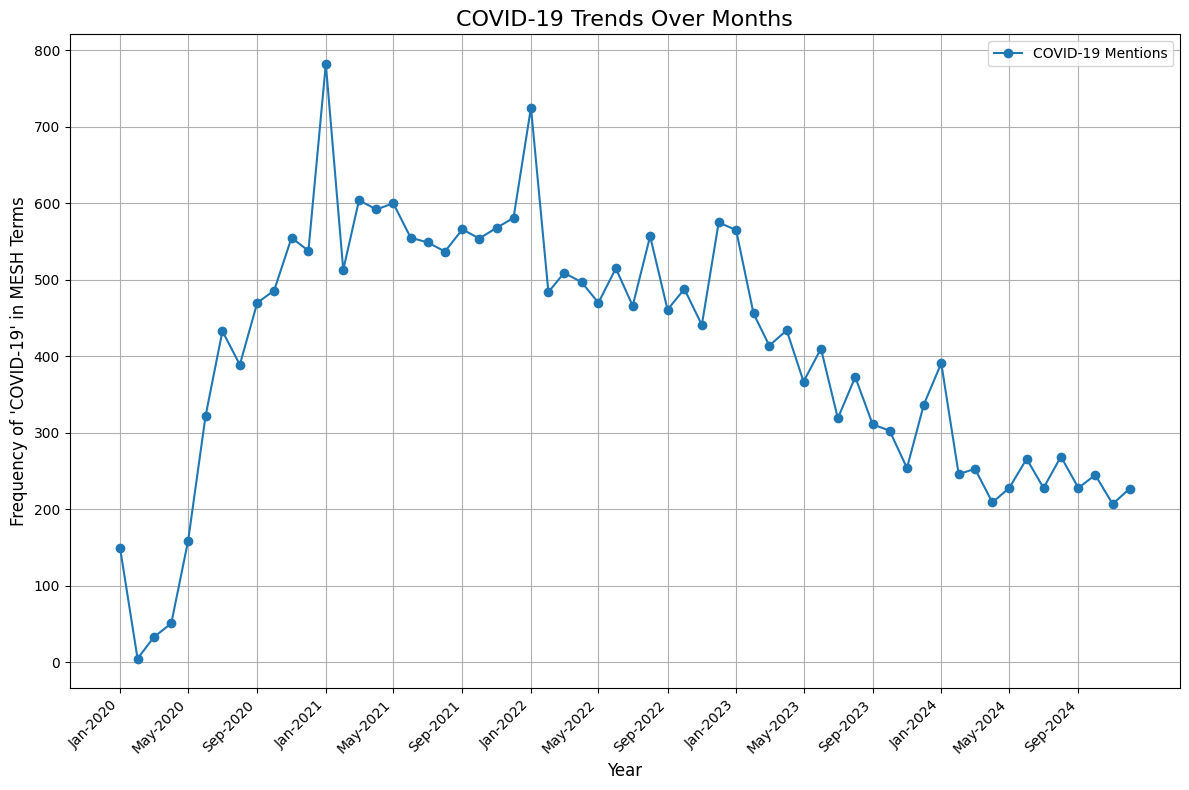

In [7]:

df['parsed_date'] = pd.to_datetime(df['parsed_date'])

df['year_month'] = df['parsed_date'].dt.to_period('M')

# Expand MESH terms into individual rows, clean them, and convert to lowercase
mesh_rows = (
    df['mesh_terms']
    .dropna() 
    .str.split(';')  
    .explode()  
    .str.strip()  
    .str.lower()  
)

# Combine expanded MESH terms with their corresponding year and month
mesh_data = pd.DataFrame({
    'mesh_terms': mesh_rows,
    'year_month': df.loc[mesh_rows.index, 'year_month']
})

# Filter for "covid-19" only
covid_data = mesh_data[mesh_data['mesh_terms'] == 'covid-19']

# Count occurrences of "covid-19" per month
covid_trends = (
    covid_data
    .groupby(['year_month'])
    .size()
    .reset_index(name='count')  # Add count column
)
# Convert 'year_month' back to datetime for plotting
covid_trends['year_month'] = covid_trends['year_month'].dt.to_timestamp()

# Plot trends
plt.figure(figsize=(12, 8))
plt.plot(covid_trends['year_month'], covid_trends['count'], marker='o', label='COVID-19 Mentions')
plt.title("COVID-19 Trends Over Months", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Frequency of 'COVID-19' in MESH Terms", fontsize=12)
plt.legend()
plt.grid(True)

# Format x-axis to display dates as "Month-Year"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45, ha='right')
plt.xticks(ticks=covid_trends['year_month'][::4], rotation=45)

plt.tight_layout()
plt.show()


We can observe that the trend in COVID-19 related articles is not monotonous and varies month to month with some peaks.


### 3.2. COVID-19 cases timeseries

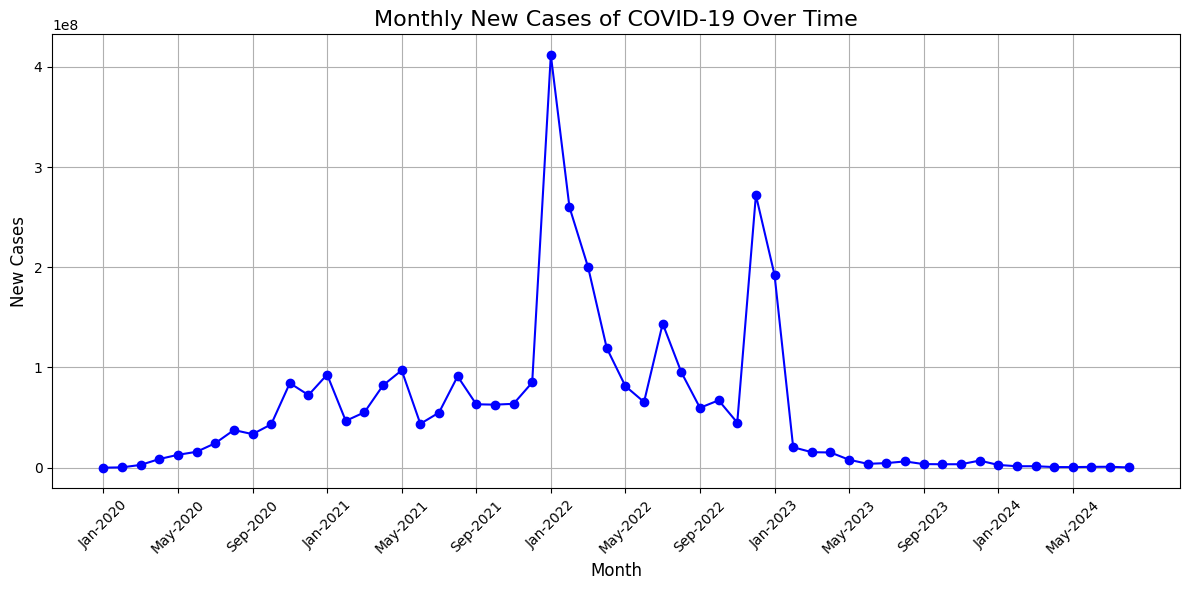

In [8]:
df_covid['date'] = pd.to_datetime(df_covid['date'])

df_covid['year_month'] = df_covid['date'].dt.to_period('M')

# Sum 'new_cases' over 'year_month'
monthly_new_cases = df_covid.groupby('year_month')['new_cases'].sum().reset_index()

# Convert 'year_month' to timestamp for plotting purposes
monthly_new_cases['year_month'] = monthly_new_cases['year_month'].dt.to_timestamp()

# Format 'year_month' to display as "Month-Year"
monthly_new_cases['year_month'] = monthly_new_cases['year_month'].dt.strftime('%b-%Y')

plt.figure(figsize=(12, 6))
plt.plot(monthly_new_cases['year_month'], monthly_new_cases['new_cases'], marker='o', linestyle='-', color='b')
plt.title('Monthly New Cases of COVID-19 Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('New Cases', fontsize=12)

# Show only every 4 months in x-axis ticks
plt.xticks(ticks=monthly_new_cases['year_month'][::4], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The plot reveals a gradual increase in new COVID-19 cases worldwide from January 2020 to December 2021. Notably, there are two significant peaks in new cases observed in January 2022 and December 2022. In the next plot, we will analyze whether the number of articles aligns with these peaks.

### 3.3 Mesh term COVID-19 and COVID-19 new cases timeseries

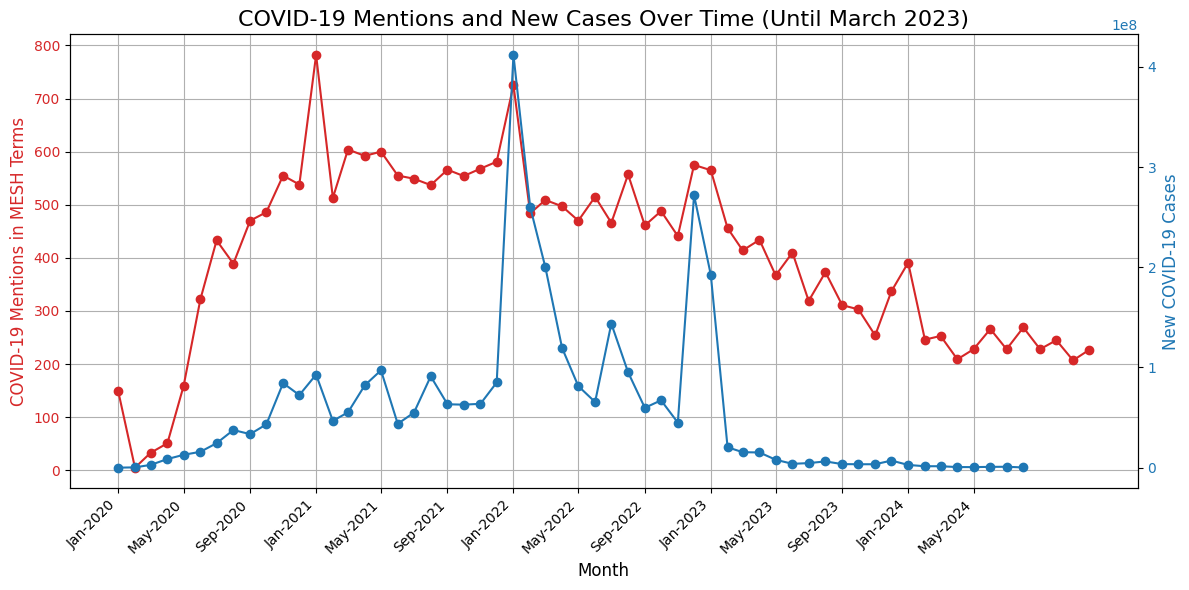

In [9]:
# Convert 'year_month' in monthly_new_cases to datetime
monthly_new_cases['year_month'] = pd.to_datetime(monthly_new_cases['year_month'], format='%b-%Y')

# Filter data up to March 2023
# cut_date = pd.Timestamp('2023-03-01')
# covid_trends = covid_trends[covid_trends['year_month'] <= cut_date]
# monthly_new_cases = monthly_new_cases[monthly_new_cases['year_month'] <= cut_date]

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot COVID-19 mentions (using ax1)
ax1.plot(covid_trends['year_month'], covid_trends['count'], marker='o', label='COVID-19 Mentions', color='tab:red')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel("COVID-19 Mentions in MESH Terms", fontsize=12, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_title("COVID-19 Mentions and New Cases Over Time (Until March 2023)", fontsize=16)
ax1.grid(True)

# Format x-axis to display dates as "Month-Year"
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a second y-axis for the new cases (using ax2)
ax2 = ax1.twinx()
ax2.plot(monthly_new_cases['year_month'], monthly_new_cases['new_cases'], marker='o', linestyle='-', color='tab:blue')
ax2.set_ylabel("New COVID-19 Cases", fontsize=12, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(ticks=monthly_new_cases['year_month'][::4], rotation=45)
# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

We can observe that the peaks in articles published related to COVID-19 align with the peaks of new COVID-19 cases. It would be worth investigating whether the increase in new COVID-19 cases influenced researchers to publish faster. Additionally, it could be that the urgency of the situation led reviewers to accelerate the review process, resulting in quicker publication times.
After January 2023, COVID-19 cases started to decrease, and accordingly, the mentions of COVID-19 in MESH Terms decreased as well.

## 4. Main conclusions

1. We can observe that the trend in COVID-19 related articles is not monotonous and varies month to month with some peaks.

2. Peaks in articles published related to COVID-19 align with the peaks of new COVID-19 cases. It would be worth investigating whether the increase in new COVID-19 cases influenced researchers to publish faster. Additionally, it could be that the urgency of the situation led reviewers to accelerate the review process, resulting in quicker publication times.

3. After January 2023, COVID-19 cases started to decrease, and accordingly, the mentions of COVID-19 in MESH Terms decreased as well.

## 5. Resources

[1] Edouard Mathieu, Hannah Ritchie, Lucas Rodés-Guirao, Cameron Appel, Daniel Gavrilov, Charlie Giattino, Joe Hasell, Bobbie Macdonald, Saloni Dattani, Diana Beltekian, Esteban Ortiz-Ospina and Max Roser (2020) - “COVID-19 Pandemic” Published online at OurWorldinData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]